In [2]:
#quick figure make for complexity class
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

          depth1       depth2  age_unc  comment
0      32.860500    32.986515      5.0      NaN
1      40.512210    42.562680      5.0      NaN
2      46.520927    48.951874      5.0      NaN
3      53.504562    56.862320      5.0      NaN
4      54.637930    58.174263      5.0      NaN
..           ...          ...      ...      ...
280  3380.670000  2526.510000      5.0      NaN
281  3385.290000  2532.450000      5.0      NaN
282  3394.590000  2544.030000      5.0      NaN
283  3397.100000  2545.840000      5.0      NaN
284  3401.540000  2549.700000      5.0      NaN

[285 rows x 4 columns]


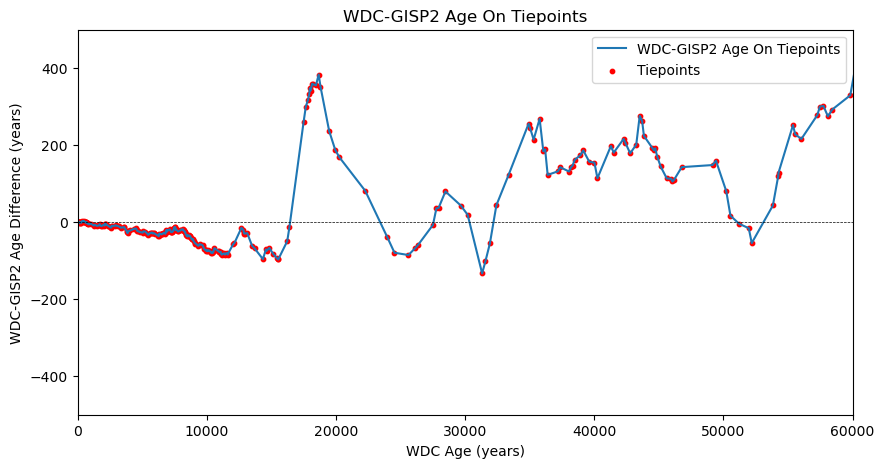

In [3]:
wdc_chron = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Antarctic Chronology Accuracy Project/Antarctic/Chronologies/WDC.txt', sep='\t', comment='#', names=['depth', 'age'])
gisp2_chron = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Antarctic Chronology Accuracy Project/Greenland/Chronologies/GISP2.txt', sep='\t', comment='#', names=['depth', 'age'])
tiepoints = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/WDC-GISP2/iceice_synchro_horizons.txt', comment='#', sep='\t')

print(tiepoints)

wdc_on_ties = np.interp(tiepoints['depth1'], wdc_chron['depth'], wdc_chron['age'])
gisp2_on_ties = np.interp(tiepoints['depth2'], gisp2_chron['depth'], gisp2_chron['age'])
plt.figure(figsize=(10, 5))
#plt.plot(tiepoints['depth1'], wdc_on_ties, label='WDC')
#plt.plot(tiepoints['depth2'], gisp2_on_ties, label='GISP2')
plt.plot(wdc_on_ties, wdc_on_ties - gisp2_on_ties, label='WDC-GISP2 Age On Tiepoints')
plt.scatter(wdc_on_ties, wdc_on_ties - gisp2_on_ties, label='Tiepoints', color = 'red', s= 10)
plt.xlim(0,60000)
plt.ylim(-500,500)
plt.legend()
plt.axhline(0, color = 'black', linewidth = 0.5, ls = '--')
plt.xlabel('WDC Age (years)')
plt.ylabel('WDC-GISP2 Age Difference (years)')
plt.title('WDC-GISP2 Age On Tiepoints')
plt.savefig('/Users/quinnmackay/Documents/GitHub/BICC/Figures/Comparisons/WDC-GISP2', dpi=300)

